## Sentiment Analyzer

#### Author: Cruz, Zachary


`Objective`: Using features pulled and derived from the Twitter API, will look to discover the relationship between sentiment variables as they relate to various Twitter metrics, where tweets mentioned the keywords "Samsung Galaxy Fold". 
   
    
`Framework`: Python tweepy library to call the Twitter API and search on a key word (provided as a `query` parameter). Then, use Textblob sentiment scoring system of polarity and subjectivity to assess the sentiment of the tweet.  The results of the api call and extracted features are then brought into a pandas dataframe where descriptive analysis are performed. 

Features extracted and derived:

* `tweet_length` - The length in characters of the tweet.
* `followers_count` - Number of followers of the Twitter user who created the tweet.
* `retweet_count` - The number of retweets the tweet garnered.
* `polarity` - The polarity score is a float within the range [-1.0, 1.0], where -01 is very negative, and 1 is very positive.
* `subjectivity` - The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.





In [1]:
# import all libraries
import pandas as pd
import numpy as np
from textblob import TextBlob 
import tweepy
import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Twitter API setup using tweepy
consumer_token = 'Jx3ttDUrxpRd5it99eWShON2o'
consumer_secret = 'oS8NxPgszNF8pDRwJqhdHK7Fxwp9srNWptPUdyxPLxNpQ2vW4C'
access_token = '1120859837456273408-mbcsEumfFhU0jEvRgh9wcVnKnKtF3i'
access_secret = '39UYlq37ZdyUEpSO5JZ81YxVMUAIf7ReePBJrpwBZgxfd'
auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
# Example of live twitter feed before analysis
n_tweets = 5
query = "Samsung Galaxy Fold"

tweets = api.search(q=query, count=n_tweets, lang='en', show_user=True)

for tweet in tweets:
    
    # print tweet create date (in UTC time), followed by the timedelta from current UTC
    print(tweet.created_at)

    
    # print screename followers and retweet count
    print('screen_name:', tweet.user.screen_name)
    print('followers:',tweet.user.followers_count)
    
    print('tweet text:', tweet.text)
    print('tweet_length:', len(tweet.text))
    
        
    # create TextBlob object from raw tweet
    analysis = TextBlob(tweet.text)
    
    # print polarity/subjectivity score
    print('polarity:',analysis.sentiment.polarity)
    print('subjectivity:',analysis.sentiment.subjectivity)
    
    print('retweets:', tweet.retweet_count)
    print("\n")

2019-04-24 08:42:04
screen_name: Monassistnum40
followers: 6859
tweet text: RT @theMrMobile: Sigh. A little grain of something found its way beneath my Galaxy Fold display. Like the saying goes: "not surprised; just…
tweet_length: 140
polarity: -0.11875
subjectivity: 0.7
retweets: 82


2019-04-24 08:42:03
screen_name: _TopTechNews
followers: 29
tweet text: Samsung has reportedly postponed the Galaxy Fold’s launch in China https://t.co/XmF5c0lTE7 https://t.co/fd0H6dfIFo
tweet_length: 114
polarity: 0.0
subjectivity: 0.0
retweets: 0


2019-04-24 08:41:53
screen_name: pefid
followers: 715
tweet text: RT @theMrMobile: Sigh. A little grain of something found its way beneath my Galaxy Fold display. Like the saying goes: "not surprised; just…
tweet_length: 140
polarity: -0.11875
subjectivity: 0.7
retweets: 82


2019-04-24 08:41:21
screen_name: petergothard
followers: 3764
tweet text: I love this. @charlesarthur sums up brilliantly how tech 'innovation' is just marketing whack and everyone's fo

In [4]:
# tweet contains:
query = "Samsung Galaxy Fold"

tweets = []

for tweet in tweepy.Cursor(api.search, q=query, lang='en', count=100, show_user=True, result_type='recent').items(1000):
    tweets.append(tweet)
            

In [5]:
# import features from 10,000 tweets into pandas dataframe 
n_tweets = len(tweets)

# create empty dataframe to be populated with results of API call


# list of columns
cols = ['tweet_length', 'followers_count','retweeted', 'polarity', 'subjectivity']

df = pd.DataFrame(np.zeros(
                      shape=(n_tweets, len(cols)), 
                      dtype='int'),
                 columns=cols)

# convert polarity/subjectivity to floats, all others are ints
df['polarity'] = df['polarity'].astype('float')
df['subjectivity'] = df['subjectivity'].astype('float')

# view shell of dataframe to be populated
df.head(1)    


# iterate through each tweet and assign features to dataframe
for i, tweet in enumerate(tweets):
    

    # append features for each tweet
    df.at[i, 'tweet_length'] = len(tweet.text)
    df.at[i, 'followers_count'] = tweet.user.followers_count               
    df.at[i, 'retweet_count'] = tweet.retweet_count
    
        
    # create TextBlob object from raw tweet
    analysis = TextBlob(tweet.text)
    
    # polarity/subjectivity score
    df.at[i, 'polarity'] = analysis.sentiment.polarity
    df.at[i, 'subjectivity'] = analysis.sentiment.subjectivity
    
                 
df.head()

,tweet_length,followers_count,retweeted,polarity,subjectivity,retweet_count
0,140,268,0,0.000,1.000,3.000
1,140,6859,0,-0.119,0.700,82.000
2,114,29,0,0.000,0.000,0.000
3,140,715,0,-0.119,0.700,82.000
4,140,3764,0,0.700,0.800,0.000


### Descriptive Statistics

In [6]:
# summary statistics
df.describe()

,tweet_length,followers_count,retweeted,polarity,subjectivity,retweet_count
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,116.007,88153.657,0.000,0.019,0.284,13.447
std,23.896,670604.148,0.000,0.213,0.330,63.759
min,31.000,0.000,0.000,-1.000,0.000,0.000
25%,96.000,118.750,0.000,0.000,0.000,0.000
50%,121.000,562.000,0.000,0.000,0.100,0.000
75%,140.000,3271.500,0.000,0.000,0.500,5.000
max,144.000,12767054.000,0.000,1.000,1.000,967.000


In [7]:
outlier_cols = ['retweet_count','followers_count']
k = 3

print('Remove outliers')
for col in df[outlier_cols]:
    df = df
    k = k
    
    outlier_threshold = k*df[col].std()

    len1 = len(df[col])
    df = df[-((df[col]-df[col].mean()).abs() > outlier_threshold)]
    len2 = len(df[col])
    print('column:',col)
    print('Removed ' + str((len1-len2)) + ' outliers (above ' + str(k) + ' standard deviations ' + str(outlier_threshold) + ').')
    print(str(len(df[col])) + ' entries remaining in data set.')
    print('*'*20)

Remove outliers
column: retweet_count
Removed 7 outliers (above 3 standard deviations 191.27733723245635).
993 entries remaining in data set.
********************
column: followers_count
Removed 11 outliers (above 3 standard deviations 2018776.1604809621).
982 entries remaining in data set.
********************


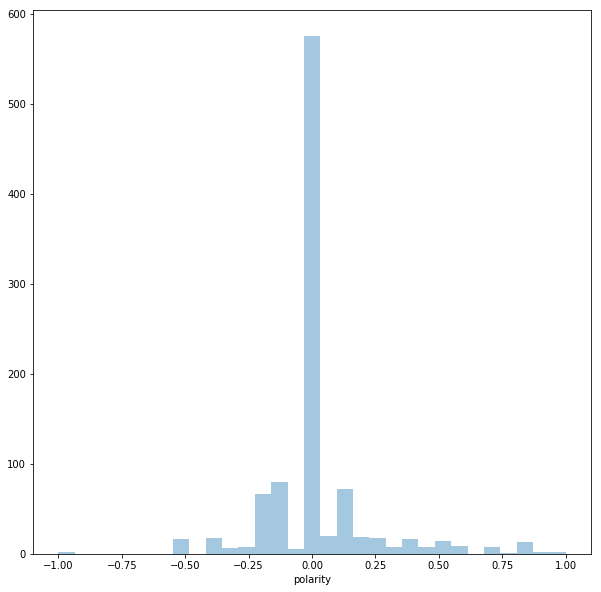

In [8]:
plt.figure(figsize=(10,10))
x = df.polarity


sns.distplot(x, hist=True, kde=False);

We see that most tweets are neutral, although the second most frequent polarity score is bucketed as -0.2, meaning tweets trend negative when they are not neutral. 

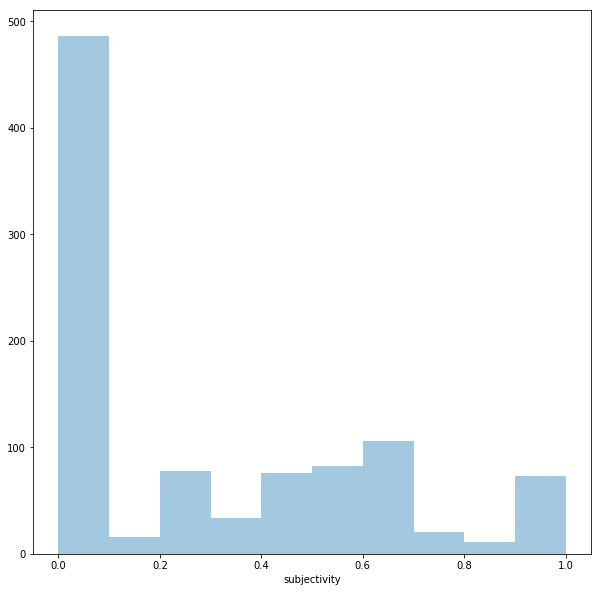

In [9]:
plt.figure(figsize=(10,10))
x = df.subjectivity


sns.distplot(x, hist=True, kde=False);

We see again that most tweets are objective (0.0 subjectivity score), and they steadily skew towards 1, as we would expect to see the lowest density towards highly subjective tweets.

#### Polarity and Subjectivity with Retweets

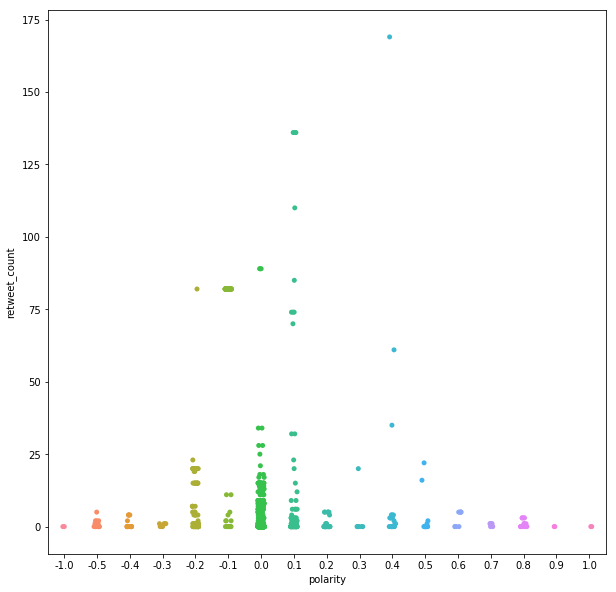

In [10]:
plt.figure(figsize=(10,10))
x = round(df.polarity,1)#[df.retweet_count <200]
y = df.retweet_count#[df.retweet_count <200]

sns.stripplot(x=x, y=y, jitter=True);

While the trend is not strong visible, we do see retweet counts decrease as sentiment polarity trends negative or positive, almost in a cone shape. In general, the highest retweets concentrate between -0.1 and 0.1 neutral sentiment.

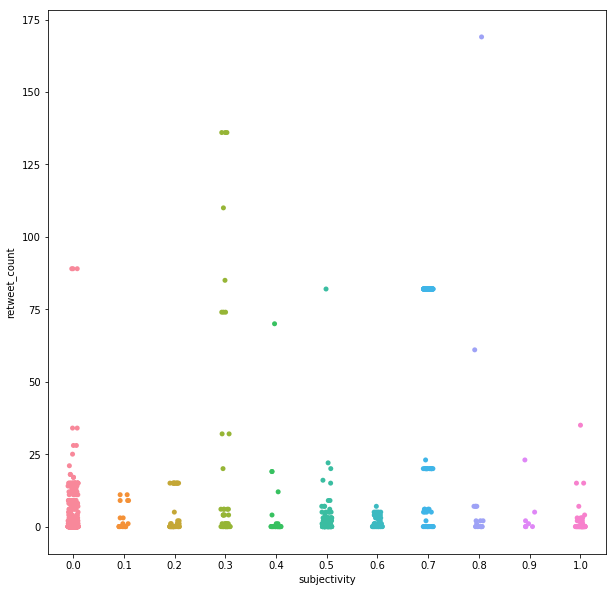

In [11]:
plt.figure(figsize=(10,10))
x = round(df.subjectivity,1)
y = df.retweet_count

sns.stripplot(x=x, y=y);

With subjectivity score, it appears that getting any retweets at all is more likely associated with more objective tweets (subjectivity score near 0.0), which can be seen with the concentrations hovering around 0.0. However, the highest number of retweets actually occur with a score of 0.3, and the highest with a score of 0.8, perhaps suggesting that influencers can get by being subjective, which is not the same sentiment as being polarizing.

#### Sentiments with tweet length

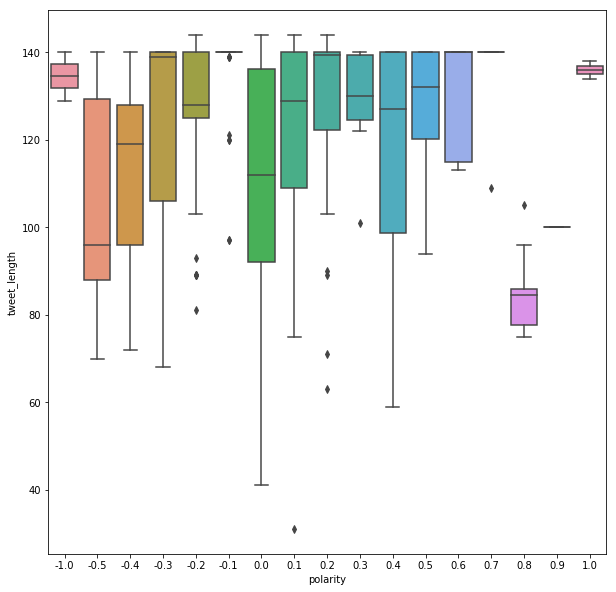

In [12]:
plt.figure(figsize=(10,10))
x = round(df.polarity,1)
y = df.tweet_length
sns.boxplot(x, y);

In regard to tweet length, we see that the most negative sentiments tend to have higher character lengths on average in our sample. Neutral tweets tend to vary widely in tweet length. Positive sentiments also trend toward higher character lengths. This could suggest that highly negative or positive tweets are verbose, as they may have a lot to say.

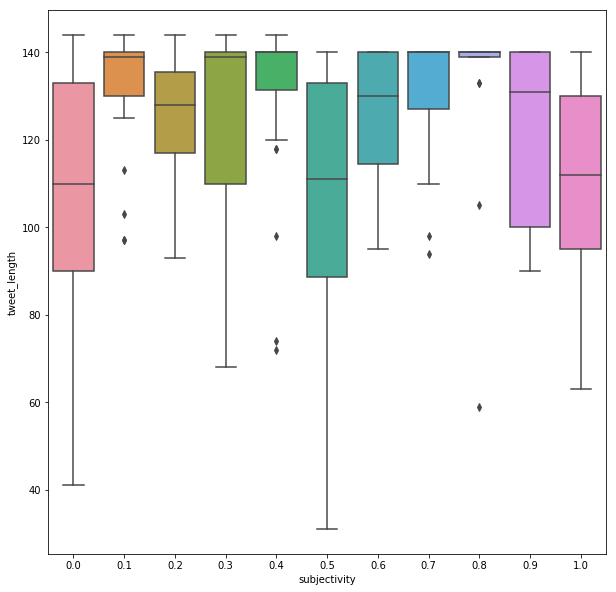

In [13]:
plt.figure(figsize=(10,10))
x = round(df.subjectivity,1)
y = df.tweet_length
sns.boxplot(x, y);

Interestingly, we do not see the same pattern with subjectivity, since the most objective and subjective tweets have fairly similar median character lengths. Perhaps Character lengths have little to do with subjectivity.

#### Sentiments with follower count

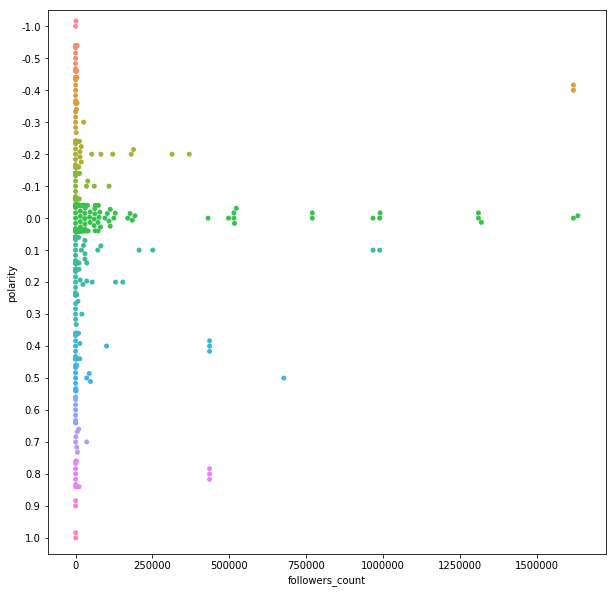

In [14]:
plt.figure(figsize=(10,10))
y = round(df.polarity,1)
x = df.followers_count
sns.swarmplot(x, y, orient='h');

In the swarm plot, every observation is accounted for with a dot. We see that neutral sentiment tweets (0.0) tend to be tied to accounts with higher number of followers. Suggesting the most influential people are not polarizing figures.

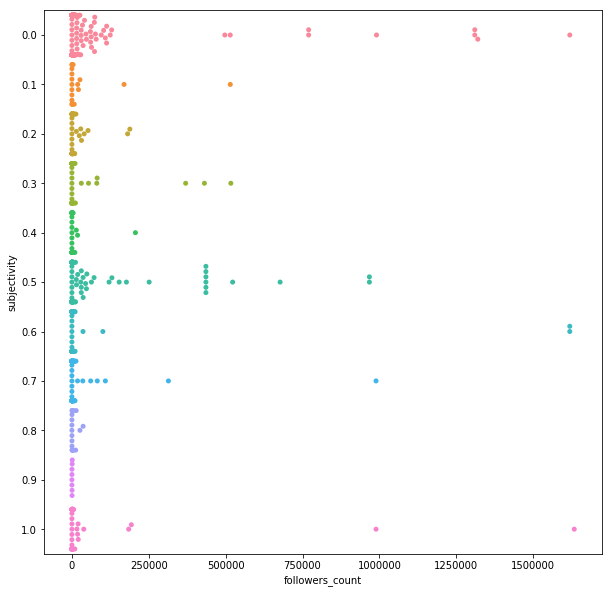

In [15]:
plt.figure(figsize=(10,10))
y = round(df.subjectivity,1)
x = df.followers_count
sns.swarmplot(x, y, orient='h');

Again, we see those with the highest followers have subjectivity scores near 0.0.

### Conclusion

The goal here was to create a pipeline to allow any query of tweets to be analyzed for sentiment analysis and other descriptive analytics. Any query can be passed in. In our example case, "Samsung Galaxy Fold", we observed 1000 recent tweets and found that the tweets overall were fairly objective, and fairly neutral in sentiment. We found that the most influential people with the most followers tend to stay neutral and objective, although they are able to get subjective and show opinion, so long as it is not too negative. Retweeted tweets also tend toward being neutral, although they do slightly learn towards negative sentiment around -0.1 and -0.2 in value. 

Similar descriptive analysis can be done with any keyword passed through the Twitter API.